# Civilization 6 Players
# Multi-Linear Regression Modelling
# Author: Lu (Christina) Jin

# Setup: Import all libraries

In [533]:
import os
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy as scipy
import re
import sklearn as sk
import warnings

import datetime as dt
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from datetime import date
from datetime import datetime
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.ticker import PercentFormatter
from scipy import stats
from scipy.stats import bartlett
from pylab import rcParams
rcParams['figure.figsize'] = (20, 10)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

# Acquiring Dataset 

In [534]:
# Read data
civ6_players_path = r'C:\Users\Lu_ki\OneDrive - Northeastern University\NU Master Courseworks\ALY6050\Course Materials\Module 1\M1 Project 1\civ6_players.xlsx'
civ6 = pd.read_excel(civ6_players_path)
civ6

,PLAYERID,INSTALLDATE,ACTIVEDAYS,LASTACTIVEDAY,LEADERMOSTSELECTED,CIVILIZATIONMOSTSELECTED,POLAND,NUBIA,KHMER_AND_INDONESIA,GATHERING_STORM,PERSIA_AND_MACEDON,VIKINGS,RISE_AND_FALL,AUSTRALIA
0,3316379,2018-01-05,1,2018-01-05,LEADER_GILGAMESH,CIVILIZATION_SUMERIA,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,3316386,2018-01-05,3,2018-01-09,LEADER_TRAJAN,CIVILIZATION_ROME,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3316394,2018-01-05,115,2018-07-08,LEADER_T_ROOSEVELT,CIVILIZATION_AMERICA,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,3888460,2018-03-04,112,2019-10-05,LEADER_HOJO,CIVILIZATION_JAPAN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,3940600,2018-03-12,1,2018-03-12,LEADER_PALA,CIVILIZATION_PALA,NaT,NaT,2018-03-12,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2969114,2017-11-12,11,2019-06-06,LEADER_CLEOPATRA,CIVILIZATION_EGYPT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499996,2945770,2017-11-04,2,2018-02-05,LEADER_BARBAROSSA,CIVILIZATION_GERMANY,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499997,2945778,2017-11-04,4,2017-11-11,LEADER_QIN,CIVILIZATION_CHINA,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499998,3309420,2018-01-04,6,2018-01-11,LEADER_VICTORIA,CIVILIZATION_ENGLAND,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [535]:
civ6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   PLAYERID                  500000 non-null  int64         
 1   INSTALLDATE               500000 non-null  datetime64[ns]
 2   ACTIVEDAYS                500000 non-null  int64         
 3   LASTACTIVEDAY             500000 non-null  datetime64[ns]
 4   LEADERMOSTSELECTED        500000 non-null  object        
 5   CIVILIZATIONMOSTSELECTED  500000 non-null  object        
 6   POLAND                    44665 non-null   datetime64[ns]
 7   NUBIA                     29385 non-null   datetime64[ns]
 8   KHMER_AND_INDONESIA       26678 non-null   datetime64[ns]
 9   GATHERING_STORM           68484 non-null   datetime64[ns]
 10  PERSIA_AND_MACEDON        60841 non-null   datetime64[ns]
 11  VIKINGS                   18670 non-null   datetime64[ns]
 12  RI

# Q1: You want to test an hypothesis and the hypothesis says that there is a relationship between:
>## Y= number of DLCs a player purchased
>## X1= active days
>## X2= number of expansion packs installed
>## X3= The distance of a player's install date from launch (For instance, CIV6 is released on Oct 21st  2016 and if a player installed the game on Oct 29th 2016 then the distance from launch is 8 days for this player)
# Please run a multiple regression model to test this hypothesis

In [536]:
# create subset df for DLC
DLC_df = civ6[["POLAND","NUBIA","KHMER_AND_INDONESIA",
               "PERSIA_AND_MACEDON", "VIKINGS","AUSTRALIA"]]
DLC_df

,POLAND,NUBIA,KHMER_AND_INDONESIA,PERSIA_AND_MACEDON,VIKINGS,AUSTRALIA
0,NaT,NaT,NaT,NaT,NaT,NaT
1,NaT,NaT,NaT,NaT,NaT,NaT
2,NaT,NaT,NaT,NaT,NaT,NaT
3,NaT,NaT,NaT,NaT,NaT,NaT
4,NaT,NaT,2018-03-12,NaT,NaT,NaT
...,...,...,...,...,...,...
499995,NaT,NaT,NaT,NaT,NaT,NaT
499996,NaT,NaT,NaT,NaT,NaT,NaT
499997,NaT,NaT,NaT,NaT,NaT,NaT
499998,NaT,NaT,NaT,NaT,NaT,NaT


In [537]:
# define y and x1
y = DLC_df.count(axis='columns')
y = y.rename('Purchased_DLCs')
Y = pd.DataFrame(y)

x1 = civ6['ACTIVEDAYS']
x1 = x1.rename('Active_Days')

In [538]:
# create subset df for extension packs
EP_df = civ6[["GATHERING_STORM", "RISE_AND_FALL"]]
EP_df

,GATHERING_STORM,RISE_AND_FALL
0,NaT,NaT
1,NaT,NaT
2,NaT,NaT
3,NaT,NaT
4,NaT,NaT
...,...,...
499995,NaT,NaT
499996,NaT,NaT
499997,NaT,NaT
499998,NaT,NaT


In [539]:
# define x2
x2 = EP_df.count(axis='columns')
x2 = x2.rename('Extension_Packs')

In [540]:
# 2nd method define x2
#civ6['LAUNCHDATE'] = "2016-10-21"
#civ6['LAUNCHDATE'] = pd.to_datetime(civ6['LAUNCHDATE'])
#civ6['DATEDIFFERENCE'] = (civ6['INSTALLDATE']-civ6['LAUNCHDATE']).dt.days
#civ6.head()

In [541]:
# define x3
launch_date = pd.to_datetime("2016-10-21")
x3=(civ6['INSTALLDATE']-launch_date).dt.days
x3 = x3.rename('Install_Distance')
#df_x3 = pd.DataFrame(x3)
x3

0         441
1         441
2         441
3         499
4         507
         ... 
499995    387
499996    379
499997    379
499998    440
499999    379
Name: Install_Distance, Length: 500000, dtype: int64

In [542]:
# the independent variables set
X = pd.concat([x1,x2,x3], axis =1)
# independent and dependent variables all in one set
all_var = pd.concat([x1,x2,x3,y], axis =1)
all_var

,Active_Days,Extension_Packs,Install_Distance,Purchased_DLCs
0,1,0,441,0
1,3,0,441,0
2,115,0,441,0
3,112,0,499,0
4,1,0,507,1
...,...,...,...,...
499995,11,0,387,0
499996,2,0,379,0
499997,4,0,379,0
499998,6,0,440,0


# Q1: a) Check multicollinearity by using Correlation plots and calculating VIF values. Is there any issues?

In [543]:
#corr_plt = all_var.corr()[['DLCs']].sort_values(by='DLCs', ascending=False)
#plt.figure(figsize=(6, 10))
#heatmap = sns.heatmap(corr_plt, vmin=-1, vmax=1, annot=True, cmap='rocket')
#heatmap.set_title('Features Correlating with Number of DLCs Purchased', fontdict={'fontsize':18}, pad=16);

Text(0.5, 1.0, 'Correlation Plot')

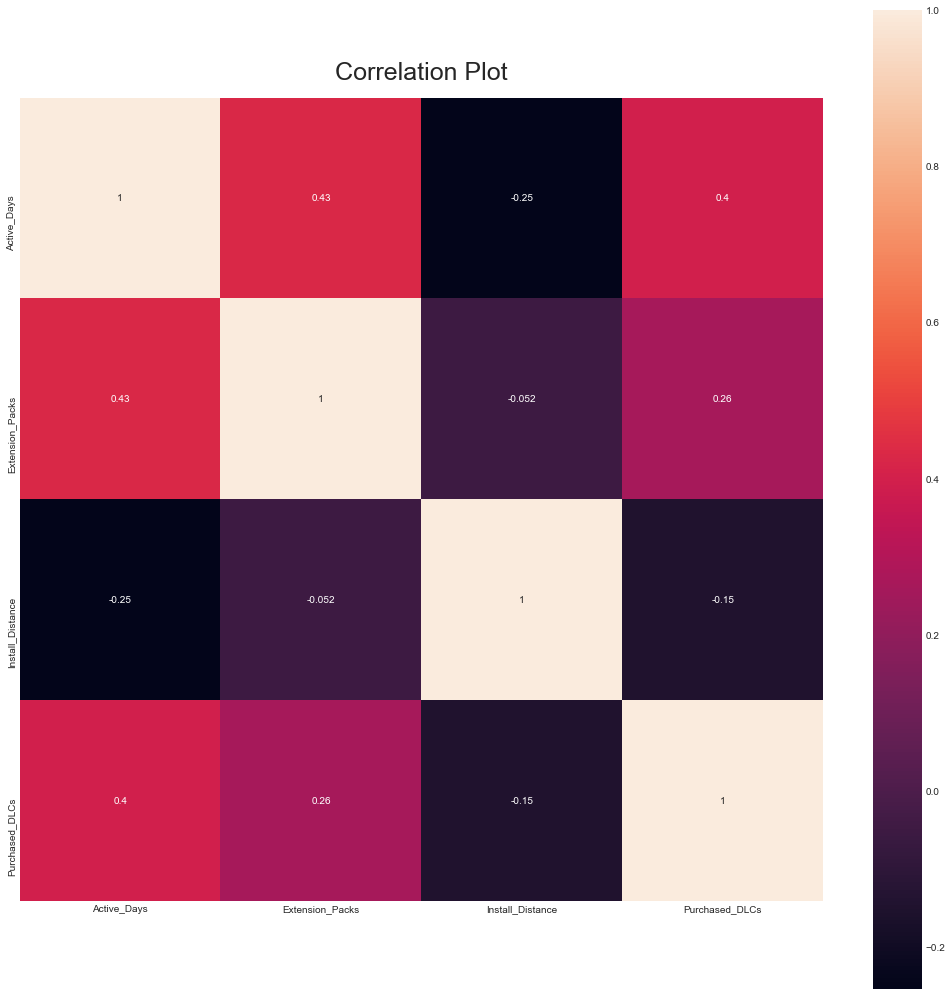

In [544]:
# correlation plot
plt.figure(figsize=(18,18))
heatmap=sns.heatmap(all_var.corr(), annot=True,cmap='rocket',square=True)
heatmap.set_title('Correlation Plot', fontdict={'fontsize':25}, pad=18)

> #### Interpreting Correlation Plot Results:
> By inspecting the 3 x 3 sub-matrix to the top left of the entire plot, none of the explanatory variables have strong correlation with each other. Only there is a slight higher correlation between "Extension Packs" and "Active Days", which is roughly 0.43. This positive correlation means that the more days a player is active on the game, the higher changes that they will have more extansion packs installed. Although this correlation is relatively strong comparing to others, but it's not significant enough to claim the presents of a multicollinearity in the model.

In [390]:
#find design matrix for linear regression model using 'DLCs' as response variable 
#y, X = dmatrices('DLCs ~ Active_Days + Extension_Packs + Install_Distance', data=all_var, return_type='dataframe')

In [545]:
# VIF dataframe
vif = pd.DataFrame()
vif["Feature"] = X.columns
  
# calculating VIF for each variables
vif["VIF_Value"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif)

            Feature  VIF_Value
0       Active_Days   1.429210
1   Extension_Packs   1.571305
2  Install_Distance   1.141556


> #### Interpreting outcome of our VIF values: 
> Each of all three VIF values are pretty close to 1, which indicates moderate correlation between any of the three explanatory variables in the model, but not highly correlate Therefore, multicollinearity will not a problem in this model.

# Q1: b) Check the assumptions of linear regression without excluding any features.

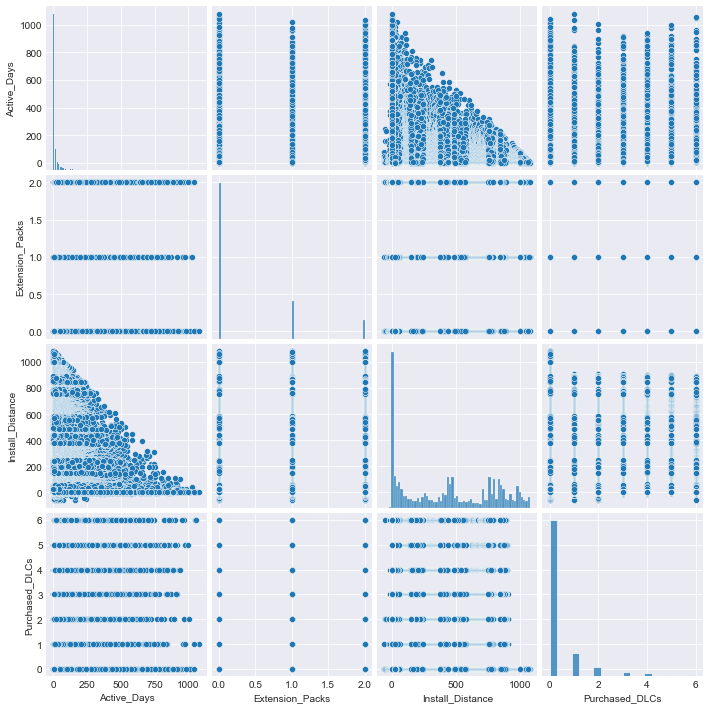

In [546]:
# inspect linearity between response variable y and each expanatory variable x
pair_plot = sns.pairplot(all_var)

> #### Test Linearity Assumption Visually:
> Firstly, we are to use the scatter plots to visually inspect the linearity. By looking at the first three plots on the bottom row of the pairplots. Each of them displays the scatter plot for relationship between the response variable - "Purchased DLCs" and the three explanatory variables - "Active Days", "Extansion Packs", and "Install Distance". Apperently there are not very strong visual linearity.

In [547]:
#ax = sns.pairplot(all_var, x_vars=["Extension_Packs","Install_Distance","Active_Days"], y_vars=['Purchased_DLCs'], height=7, aspect=0.7)

In [548]:
# test linearity assupmtion
all_var.corr()['Purchased_DLCs']

Active_Days         0.395834
Extension_Packs     0.263841
Install_Distance   -0.145807
Purchased_DLCs      1.000000
Name: Purchased_DLCs, dtype: float64

> #### Test Linearity Assumption By Quantitative Values:
> Next, we are to get the Pearson's correlation coefficient (r) to check the linearity using quantitative values. As the numerical value shows, "Purchased DLCs" has a slight higher correlation with "Active Days": roughly 0.4; The second higher correlation appears to be with "Extension Packs": roughly 0.26; and the least correlation is with "Install Distance": roughly -0.15, this negative relationship indicates that the longer a player had waited to purchase the game after the release date, the lower chances that they will purchase (or purchase as much) DLCs. 

In [549]:
# define expression of the model
model_expression = 'Purchased_DLCs ~ Active_Days + Extension_Packs + Install_Distance'

# develop X and y matrices
y, X = dmatrices(model_expression, all_var, return_type='dataframe')

# split subset of data sets for training and testing purposes
# 70% data are for training and 30% are for testing
train_df = np.random.rand(len(X)) < 0.7
X_train = X[train_df]
y_train = y[train_df]
X_test = X[train_df]
y_test = y[train_df]

# build and train an OLS Regression Model on the training data set
civ6_model = sm.OLS(y_train,X_train).fit()
civ6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Purchased_DLCs   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                 2.369e+04
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:10:33   Log-Likelihood:            -4.4955e+05
No. Observations:              350056   AIC:                         8.991e+05
Df Residuals:                  350052   BIC:                         8.992e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2542      0.003     94.661      0.000       0.249       0.259
Active_Days          0.0063   3.42e-05    185.534      0.000       0.006       0.006
Extension_Packs      0.1814      0.003     70.901      0.000       0.176       0.186
Install_Distance    -0.0002   4.29e-06    -35.153      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   176079.226   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1415833.821
Skew:                           2.295   Prob(JB):                         0.00
Kurtosis:                      11.718   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [550]:
# get prediction results
civ6_prediction = civ6_model.get_prediction(X_test)
civ6_prediction_summary = civ6_prediction.summary_frame()
civ6_prediction_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.193966,0.001736,0.190563,0.197368,-1.518992,1.906923
1,0.206643,0.001722,0.203267,0.210018,-1.506315,1.919600
2,0.916565,0.003901,0.908919,0.924211,-0.796406,2.629536
7,0.397438,0.002444,0.392647,0.402229,-1.315523,2.110398
8,0.186419,0.001731,0.183026,0.189812,-1.526538,1.899377
...,...,...,...,...,...,...
499993,0.132087,0.002366,0.127449,0.136724,-1.580874,1.845047
499995,0.265501,0.001718,0.262134,0.268868,-1.447456,1.978459
499996,0.209661,0.001770,0.206193,0.213130,-1.503296,1.922619
499997,0.222339,0.001755,0.218899,0.225779,-1.490619,1.935296


In [551]:
# define y predictions and calculate residuals
y_pred = civ6_prediction_summary['mean']
residual = y_test['Purchased_DLCs'] - y_pred
residual

0        -0.193966
1        -0.206643
2        -0.916565
7        -0.397438
8        -0.186419
            ...   
499993   -0.132087
499995   -0.265501
499996   -0.209661
499997   -0.222339
499999   -0.488559
Length: 350056, dtype: float64

In [552]:
# Check for mean of residuals
residual.mean()

6.035152013144072e-16

> The mean of residuals is pretty small, close to zero, this partially verifies the linearity regression assumption of the model for the residuals being zero. 

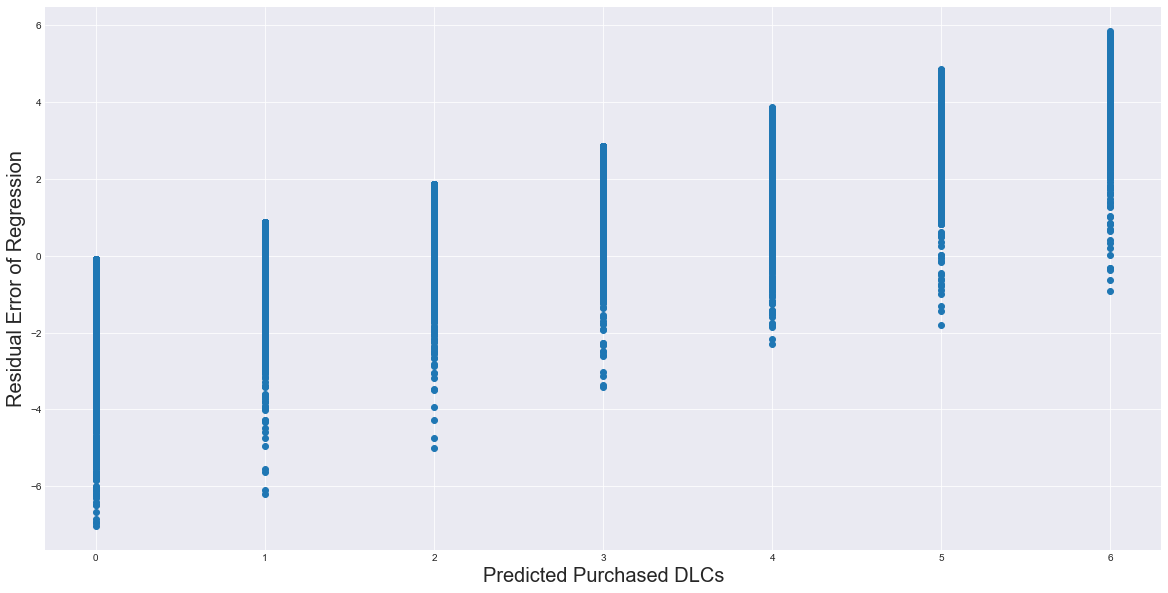

In [553]:
# plot residual errors of regression
plt.xlabel('Predicted Purchased DLCs', fontsize=20)
plt.ylabel('Residual Error of Regression', fontsize=20)
plt.scatter(y_test['Purchased_DLCs'], residual)
plt.show()

> The residuals seem to show a linear pattern throughout the entire scale of the purchased DLCs, instead of having identical distributions. This indicates that the predictions of the model is not quite reliable, espcially at pretty extreme values.

In [554]:
# Test for nomality of residual errors by measuring skewness and kurtosis
# desirable skewness is 0 and desirable kurtosis is 3, which represents perfectly normal distribution 
jb_test_parameters = ['Skewness', 'Kurtosis', 'Chi-square p-value']
jb_test_values = sms.jarque_bera(residual)
lzip(jb_test_parameters, jb_test_values)

[('Skewness', 1415833.8207819671),
 ('Kurtosis', 0.0),
 ('Chi-square p-value', 2.294542552827222)]

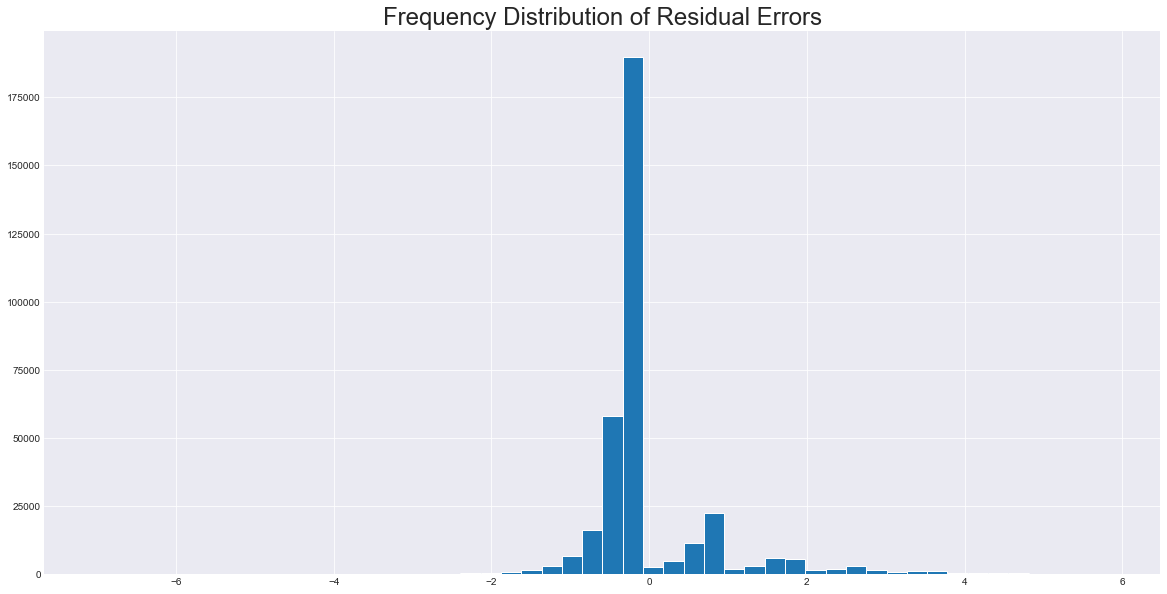

In [555]:
# test normality of residual errors visually - plot method 1
resid_plot = residual.hist(bins=50)
resid_plot = plt.title('Frequency Distribution of Residual Errors',size=24)
plt.show()

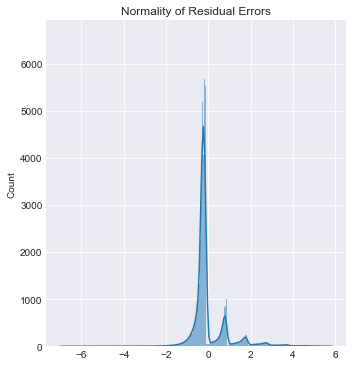

In [556]:
# test normality of residual errors visually - plot method 2
resid_plot_2 = sns.displot(residual,kde=True)
resid_plot_2 = plt.title('Normality of Residual Errors')

In [557]:
# test homoscedasticity of residual errors
w_test_parameters = ['F-stat', 'F-test p-value']
w_test_values = het_white(residual, X_test)
lzip(w_test_parameters, w_test_values)

[('F-stat', 52629.026879171724), ('F-test p-value', 0.0)]

> Since the F-test for regresssion has returned a value less than 0.05. Thus, with at least 95% confidence we can reject the null hypothesis of the F-test that the residual errors are homoscedastic. This means that the residual errors are not homoscedastic.


# Q1: c) Run the regression model and explain if you rejected the hypothesis above or not? If rejected why?

In [558]:
# Method 1: using Statsmodel
X_cons = sm.add_constant(X)
civ6_multi_reg = sm.OLS(Y,X_cons).fit()
civ6_multi_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Purchased_DLCs   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                 3.425e+04
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:10:51   Log-Likelihood:            -6.4283e+05
No. Observations:              500000   AIC:                         1.286e+06
Df Residuals:                  499996   BIC:                         1.286e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2534      0.002    112.644      0.000       0.249       0.258
Active_Days          0.0064   2.87e-05    224.111      0.000       0.006       0.006
Extension_Packs      0.1790      0.002     83.494      0.000       0.175       0.183
Install_Distance    -0.0002    3.6e-06    -41.867      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   251608.312   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2023359.333
Skew:                           2.296   Prob(JB):                         0.00
Kurtosis:                      11.720   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> As notes #2 states, the condition number is rather large, but since ther is no strong multicollinearity issue as we have confirmed in last section, then it means there might be other numerical problems. 

> #### Multiple Regression Model Analysis:
> By analyzing the results of the auxiliary test models in the last section, we could get some general idea of how well the model fits. First of all, the response variable does not show significant linearity with either of the three explanatory variables. Secondly, although the mean of residuals is vey close to 0, but when checking the normality, and homoscedasticity of the resuiduals, it shows a strong sign that the residuals are not normally and identically distributed.
> Next, looking at results of this section, according to the outcome of the multiple regression model, there is definitely a relationship between these variables, but since the R value is rather small (~ 0.17), meaning that this model isn't a very good represention. In other words, althgouh the variables x1, x2, & x3 (which are "Active Days", "Extension Packs", and "Install Distance" - How long after the release date have the player installed game) does make an impact on the number of DLCs a player purchased, they are not super good measurements or key affactors.
> Therefore, although I would probably not fully reject the hypothesis above, I would definitely think this model needs some improvements and tweaks.

# Q1: d) Share the output of multiple regression model. Write the multiple regression equation based on model output.

In [559]:
# Method 2: using Sci-Kit Learn (sklearn)
X = pd.concat([x1,x2,x3], axis =1)
print(X)
print(Y)
civ6_reg_model = linear_model.LinearRegression()
civ6_reg_model.fit(X, Y)

print('R^2 value is', civ6_reg_model.score(X, Y))
print('Coefficients are', civ6_reg_model.coef_)
print('Intercept is ', civ6_reg_model.intercept_)

        Active_Days  Extension_Packs  Install_Distance
0                 1                0               441
1                 3                0               441
2               115                0               441
3               112                0               499
4                 1                0               507
...             ...              ...               ...
499995           11                0               387
499996            2                0               379
499997            4                0               379
499998            6                0               440
499999           46                0               379

[500000 rows x 3 columns]
        Purchased_DLCs
0                    0
1                    0
2                    0
3                    0
4                    1
...                ...
499995               0
499996               0
499997               0
499998               0
499999               0

[500000 rows x 1 columns]
R^2 value 

In [588]:
print("Multiple Regression Equation of CIV6 Players is:\n", "Y = 0.2534 + 0.0064*x1 + 0.179*x2 + 0.00015*x3") 

Multiple Regression Equation of CIV6 Players is:
 Y = 0.2534 + 0.0064*x1 + 0.179*x2 + 0.00015*x3


# Q2. Detect the outliers in active days column by using Jacknife Distances method. Show your analysis as box plot.

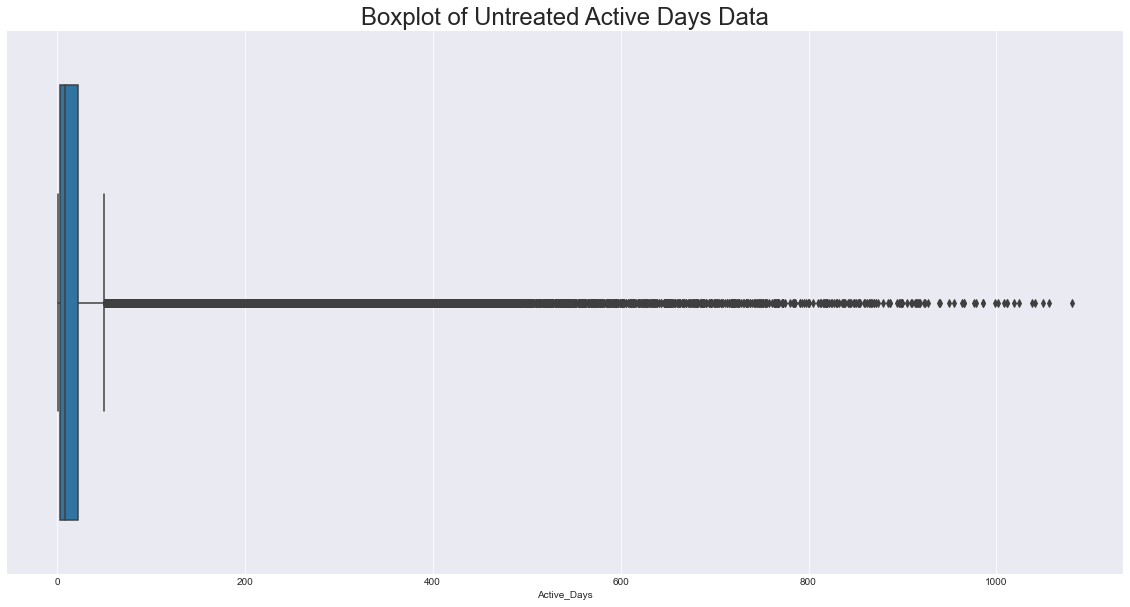

In [561]:
active_days_plot = sns.boxplot(all_var['Active_Days'])
active_days_plot = plt.title("Boxplot of Untreated Active Days Data",size=24)
plt.show()
warnings.filterwarnings("ignore")

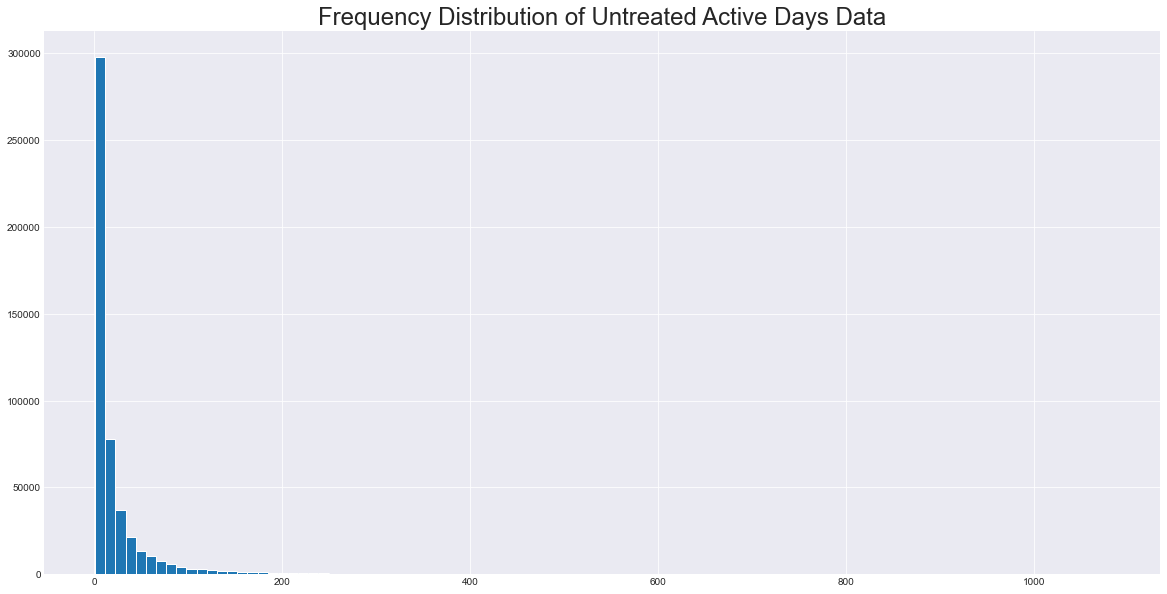

In [562]:
Active_Days_plot = all_var['Active_Days'].hist(bins=100)
Active_Days_plot = plt.title('Frequency Distribution of Untreated Active Days Data',size=24)
plt.show()

In [563]:
# Define Jackknife Distance method:
def detect_outliers_JDM(df):
    Q1, Q3 = np.percentile(df,[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR*1.5)
    upper_bound = Q3 + (IQR*1.5)
    return np.where((df <= lower_bound) | (df >= upper_bound))

# Detect outliers with Jackknife Distance:
Active_Days_outliers = pd.DataFrame(detect_outliers_JDM(all_var['Active_Days'])).T
Active_Days_outliers

,0
0,2
1,3
2,22
3,75
4,119
...,...
57132,499946
57133,499958
57134,499968
57135,499972


In [564]:
Q1, Q3 = np.percentile(all_var['Active_Days'],[25,75])
IQR = Q3 - Q1
lower_bound = Q1 - (IQR*1.5)
upper_bound = Q3 + (IQR*1.5)

print (lower_bound, upper_bound)

-25.5 50.5


In [565]:
# since lower bound is a negetive number, so we will set a different lower bound
lower_bound = all_var['Active_Days'].quantile(.01)
lower_bound

1.0

# Q3: Remove the outlier players you detected in Q2 and run the model with the remaining players.

In [566]:
all_var.describe()

,Active_Days,Extension_Packs,Install_Distance,Purchased_DLCs
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,23.590800,0.358446,442.459044,0.402634
std,49.390431,0.640206,356.510697,0.960957
min,1.000000,0.000000,-59.000000,0.000000
25%,3.000000,0.000000,63.000000,0.000000
50%,8.000000,0.000000,441.000000,0.000000
75%,22.000000,1.000000,792.000000,0.000000
max,1081.000000,2.000000,1082.000000,6.000000


In [567]:
# get outliers of the data frame
all_var_outliers = all_var.loc[((all_var['Active_Days'] <= lower_bound) | 
                                         (all_var['Active_Days'] >= upper_bound))]

# remove outliers from the data frame
all_var_trimmed = all_var.loc[((all_var['Active_Days'] > lower_bound) & 
                                     (all_var['Active_Days'] < upper_bound))]
all_var_trimmed.describe()

,Active_Days,Extension_Packs,Install_Distance,Purchased_DLCs
count,386932.000000,386932.000000,386932.000000,386932.000000
mean,12.336312,0.276571,450.857572,0.300660
std,11.371571,0.546782,353.977273,0.744107
min,2.000000,0.000000,-59.000000,0.000000
25%,4.000000,0.000000,67.000000,0.000000
50%,8.000000,0.000000,444.000000,0.000000
75%,17.000000,0.000000,793.000000,0.000000
max,50.000000,2.000000,1082.000000,6.000000


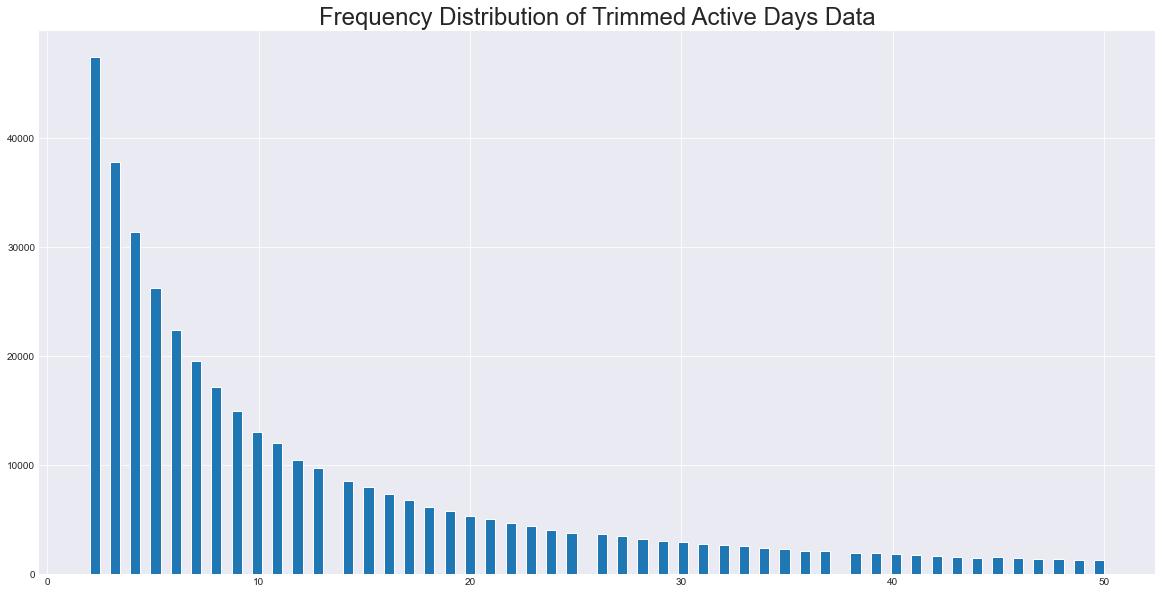

In [568]:
Active_Days_trimmed_plot = all_var_trimmed['Active_Days'].hist(bins=100)
Active_Days_trimmed_plot = plt.title('Frequency Distribution of Trimmed Active Days Data',size=24)
plt.show()

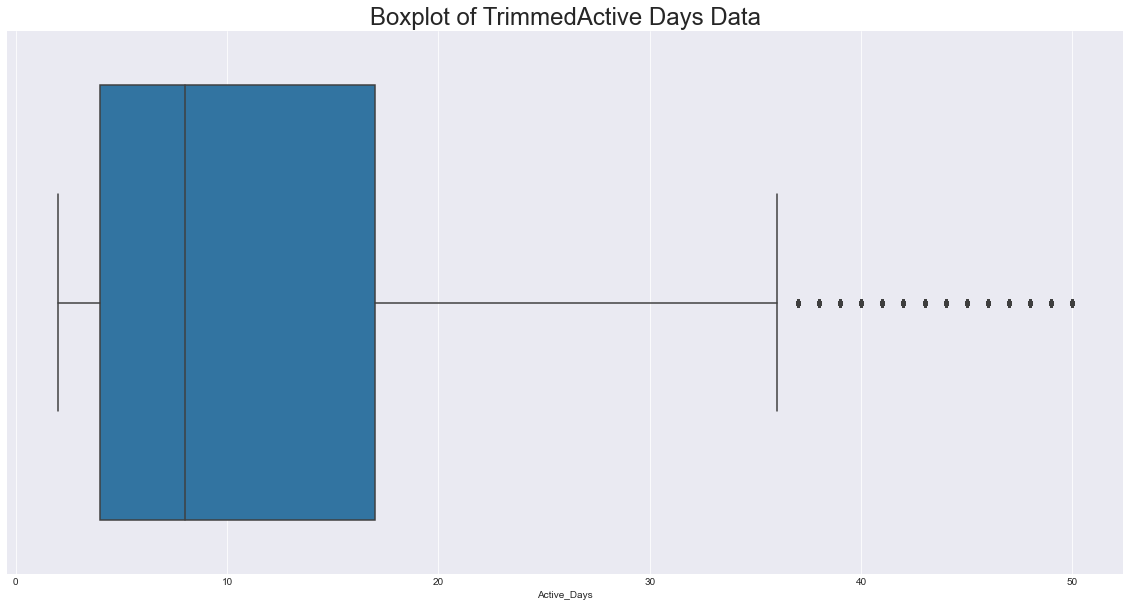

In [569]:
active_days_trimmed_plot = sns.boxplot(all_var_trimmed['Active_Days'])
active_days_trimmed_plot = plt.title("Boxplot of TrimmedActive Days Data",size=24)
plt.show()
warnings.filterwarnings("ignore")

> ### Run Model with Remaining Players (Trimmed Dataset)

In [570]:
# test linearity assupmtion
all_var_trimmed.corr()['Purchased_DLCs']

Active_Days         0.251520
Extension_Packs     0.073095
Install_Distance   -0.046084
Purchased_DLCs      1.000000
Name: Purchased_DLCs, dtype: float64

In [571]:
# define expression of the model
trimmed_model_expression = 'Purchased_DLCs ~ Active_Days + Extension_Packs + Install_Distance'

# develop X and y matrices
y2, X2 = dmatrices(trimmed_model_expression, all_var_trimmed, return_type='dataframe')

# split subset of data sets for training and testing purposes
# 70% data are for training and 30% are for testing
train_df = np.random.rand(len(X2)) < 0.7
X2_train = X2[train_df]
y2_train = y2[train_df]
X2_test = X2[train_df]
y2_test = y2[train_df]

# build and train an OLS Regression Model on the training data set
civ6_trimmed_model = sm.OLS(y2_train,X2_train).fit()
civ6_trimmed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Purchased_DLCs   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     6022.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:21:12   Log-Likelihood:            -2.9531e+05
No. Observations:              270830   AIC:                         5.906e+05
Df Residuals:                  270826   BIC:                         5.907e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0860      0.003     28.879      0.000       0.080       0.092
Active_Days          0.0168      0.000    125.243      0.000       0.017       0.017
Extension_Packs     -0.0179      0.003     -6.542      0.000      -0.023      -0.013
Install_Distance  2.691e-05   4.09e-06      6.574      0.000    1.89e-05    3.49e-05
==============================================================================
Omnibus:                   169645.612   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1836756.927
Skew:                           2.935   Prob(JB):                         0.00
Kurtosis:                      14.328   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [573]:
# get prediction results
civ6_trimmed_prediction = civ6_trimmed_model.get_prediction(X2_test)
civ6_trimmed_prediction_summary = civ6_trimmed_prediction.summary_frame()
civ6_trimmed_prediction_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
1,0.148381,0.001839,0.144777,0.151986,-1.262735,1.559498
5,0.131559,0.001915,0.127806,0.135311,-1.279558,1.542675
6,0.215673,0.001615,0.212507,0.218838,-1.195442,1.626788
9,0.198850,0.001658,0.195601,0.202099,-1.212265,1.609965
12,0.266141,0.001551,0.263100,0.269182,-1.144974,1.677256
...,...,...,...,...,...,...
499994,0.429304,0.002870,0.423679,0.434929,-0.981819,1.840427
499995,0.281511,0.001560,0.278453,0.284569,-1.129604,1.692626
499997,0.163536,0.001817,0.159974,0.167098,-1.247580,1.574652
499998,0.198823,0.001658,0.195573,0.202073,-1.212292,1.609938


In [574]:
# define y predictions and calculate residuals
y2_pred = civ6_trimmed_prediction_summary['mean']
residual_2 = y2_test['Purchased_DLCs'] - y2_pred
residual_2

1        -0.148381
5        -0.131559
6        -0.215673
9        -0.198850
12       -0.266141
            ...   
499994    1.570696
499995   -0.281511
499997   -0.163536
499998   -0.198823
499999   -0.870094
Length: 270830, dtype: float64

In [575]:
# Check for mean of residuals
residual_2.mean()

2.271364755950842e-14

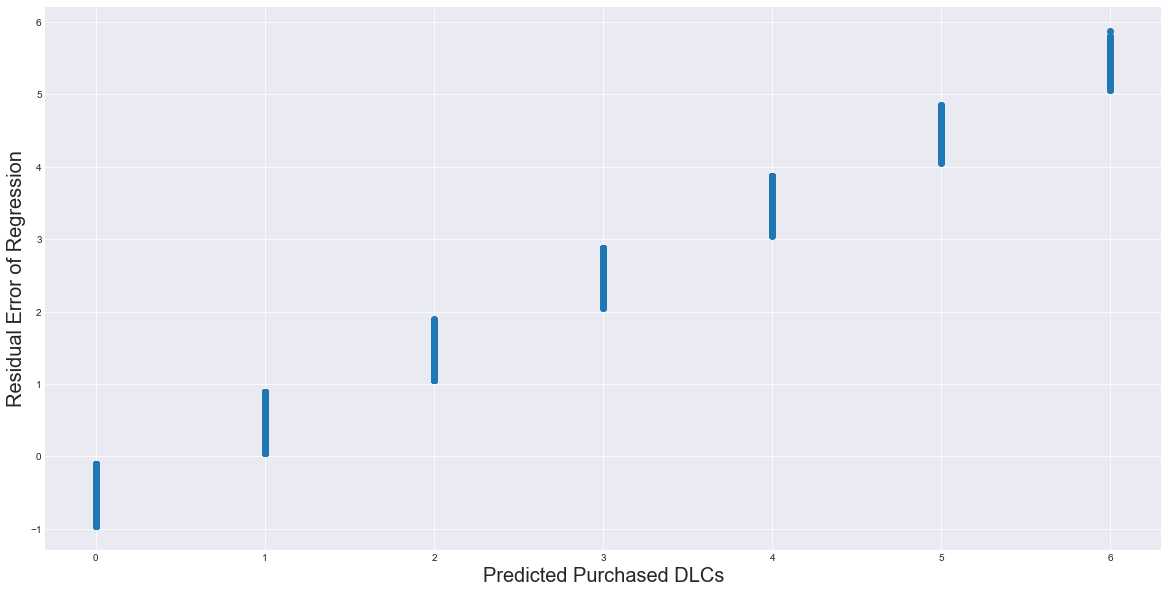

In [577]:
# plot residual errors of regression
plt.xlabel('Predicted Purchased DLCs', fontsize=20)
plt.ylabel('Residual Error of Regression', fontsize=20)
plt.scatter(y2_test['Purchased_DLCs'], residual_2)
plt.show()

In [578]:
# Test for nomality of residual errors by measuring skewness and kurtosis
# desirable skewness is 0 and desirable kurtosis is 3, which represents perfectly normal distribution 
jb_test_parameters = ['Skewness', 'Kurtosis', 'Chi-square p-value']
jb_test_values = sms.jarque_bera(residual_2)
lzip(jb_test_parameters, jb_test_values)

[('Skewness', 1836756.9269111871),
 ('Kurtosis', 0.0),
 ('Chi-square p-value', 2.934844719925102)]

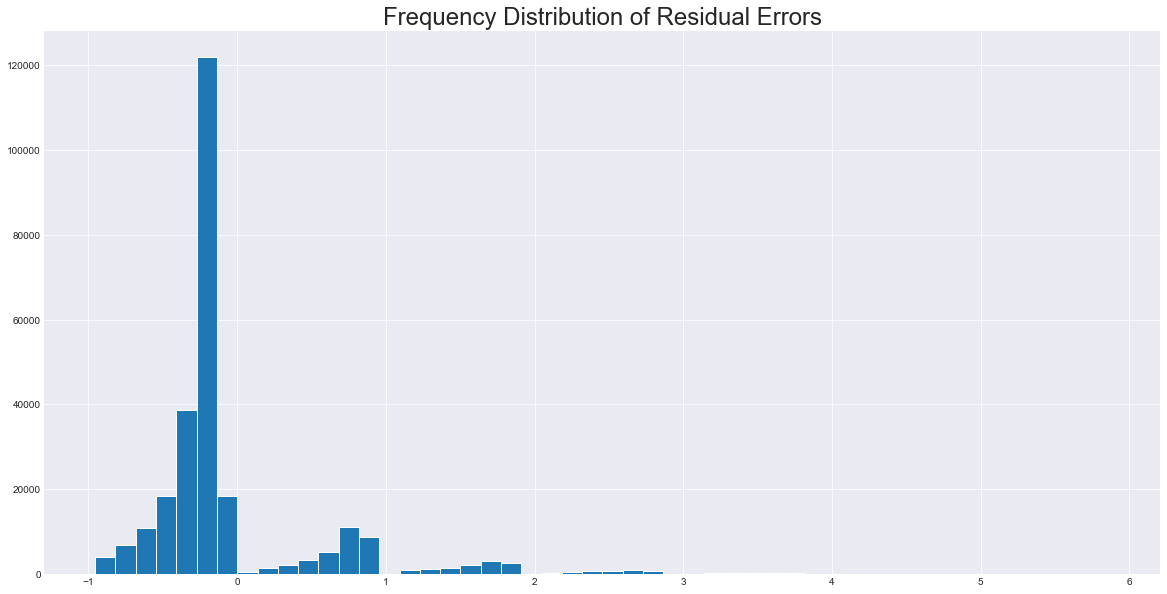

In [579]:
# test normality of residual errors visually - plot method 1
resid2_plot = residual_2.hist(bins=50)
resid2_plot = plt.title('Frequency Distribution of Residual Errors',size=24)
plt.show()

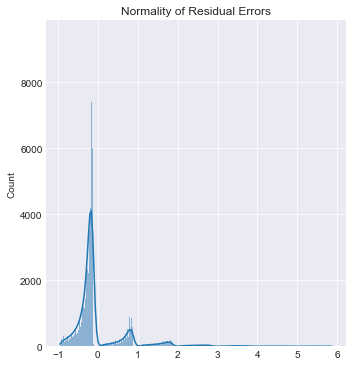

In [581]:
# test normality of residual errors visually - plot method 2
resid2_plot_2 = sns.displot(residual_2,kde=True)
resid2_plot_2 = plt.title('Normality of Residual Errors')

In [583]:
# test homoscedasticity of residual errors
w_test_parameters = ['F-stat', 'F-test p-value']
w_test_values = het_white(residual_2, X2_test)
lzip(w_test_parameters, w_test_values)

[('F-stat', 15279.682750442871), ('F-test p-value', 0.0)]

In [587]:
# Method 2: using Sci-Kit Learn (sklearn)
trimmed_x1 = all_var_trimmed['Active_Days']
trimmed_x2 = all_var_trimmed['Extension_Packs']
trimmed_x3 = all_var_trimmed['Install_Distance']
X_2 = pd.concat([trimmed_x1,trimmed_x2,trimmed_x3], axis =1)
Y_2 = all_var_trimmed['Purchased_DLCs']
print(X_2)
print(Y_2)
civ6_trimmed_reg_model = linear_model.LinearRegression()
civ6_trimmed_reg_model.fit(X_2, Y_2)

print('R^2 value is', civ6_trimmed_reg_model.score(X_2, Y_2))
print('Coefficients are', civ6_trimmed_reg_model.coef_)
print('Intercept is ', civ6_trimmed_reg_model.intercept_)

        Active_Days  Extension_Packs  Install_Distance
1                 3                0               441
5                 2                0               441
6                 7                0               441
7                 7                1               547
9                 6                0               441
...             ...              ...               ...
499995           11                0               387
499996            2                0               379
499997            4                0               379
499998            6                0               440
499999           46                0               379

[386932 rows x 3 columns]
1         0
5         0
6         0
7         0
9         0
         ..
499995    0
499996    0
499997    0
499998    0
499999    0
Name: Purchased_DLCs, Length: 386932, dtype: int64
R^2 value is 0.06354516404244848
Coefficients are [ 1.69551246e-02 -1.78726687e-02  3.04024809e-05]
Intercept is  0.08273221755534

In [589]:
print("Multiple Regression Equation of CIV6 Players after removing the outliers is:\n", "Y_2 = 0.083 + 0.01696*x1 + 0.0179*x2 + 0.00003*x3") 

Multiple Regression Equation of CIV6 Players after removing the outliers is:
 Y_2 = 0.083 + 0.01696*x1 + 0.0179*x2 + 0.00003*x3


# Q4: Which model is better Q1 or Q3? Why? 

> Comparing the two models in question 1 and 3, intuitively I would definitely think that the model from question 3 might delivers better performance. Since we have the outliers cutted out, it should be a better fit. But suprisingly, when looking at the R-square value, the later model for question 3 (R^2 = 0.0635) is less than half of the model for question 1 (R^2 = 0.17). On the other hand, the mean / normality / homoscedasticity of the residuals of Q3 model doesn't seem to outperform the Q1 moel residuals. Thus, if we are to merely consider the R-square value and the predicted residual values, then Q1 model has a slight better performance. But if we are to flow the common steps of data processing and regression model developing, then it is important to apply some data cleaning piror to further processing and modeling.